In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Title: Alcohol Consumption and Regions: An Investigation

Intro

Alcohol consumption is oftentimes involved in activities as a form of bonding and to facilitate socialization, moreover, it can be a part of one's culture. For example, there are "wet cultures" where alcohol is common in everyday life, which are in European countries around the Mediterranean and "consumed with meals", with lower rates of abstinence. Or, there are "dry cultures" where alcohol is uncommon with higher rates of abstinence, such as Canada(Bloomfield et al., 2003). The differences of alcohol in countries have been showed in studies previously. For example, a study found that German respondents had an alcohol consumption that was twice as high as US respondents (Bloomfield et al., 2003)

It is important to note that excessive consumption of alcohol is linked to many negative health outcomes. It may lead to crimes, road incidents, diseases and health impacts (Ritchie et al., 2018). Alcohol can cause addiction, and after drinking alcohol the effects can persist for hours (Babor et al., 2010). A European longitudinal study also demonstrated that job loss had a positive association with hazardous drinking over the span of 6 years (Bosque-Prous et al., 2015). Thus, one can see the substantial impacts of alcohol consumption on populations.

Our analysis uses data, "Happiness and Alcohol Consumption" found on Kaggle.com and will seek to answer the following question: What regions would have a certain alcohol consumption (beer, wine and spirit per capita)?  In this analysis, this expansive dataset was collected by Marcos Pessotto. In our dataset, we will be using the variables: “Region”, “Beer_PerCapita” and “Wine_PerCapita”. For our project, we hypothesize that the higher the beer, wine and spirit consumption per capita, it will most likely to be located on the Western Europe region as Western Europe regions borders the Mediterranean, where "wet culture" is prevalent (Bloomfield et al., 2003). 

To begin analyzing our data, we first loaded in all the packages we needed using the 'library' function.
Our dataset is taken from Kaggle. 

First, we had to download the dataset from the web onto the computer. Second, we uploaded the file into the juypter directory we are working in.
Next, we set the seed to ensure that the sequence of numbers that is randomly generated is reproducible and we read in the data using the 'read_csv' function with a relative pathway. Below is the data that was read. 

In [2]:
set.seed(20)

url <- "https://drive.google.com/uc?export=download&id=1jjBVsxq8p2lxJlHJ37QiwPDmb-sK_V6L"

alcohol_data <- read.csv(url)

alcohol_data

Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
Denmark,Western Europe,north,7.526,928,53.579,224,81,278
Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
Iceland,Western Europe,north,7.501,933,60.530,233,61,78
Norway,Western Europe,north,7.498,951,70.890,169,71,129
Finland,Western Europe,north,7.413,918,43.433,263,133,97
Canada,North America,north,7.404,922,42.349,240,122,100
Netherlands,Western Europe,north,7.339,928,45.638,251,88,190
New Zealand,Australia and New Zealand,south,7.334,915,40.332,203,79,175
Australia,Australia and New Zealand,south,7.313,938,49.897,261,72,212


**Table 1: Unclean Alcohol Dataset**

Doing a quick analysis of the data reveals that there are 9 variables. The dataset is pretty tidy - each row is one observation - an observation of one specific country and its region, and its respective elements such as HappinessScore, HDI, GDP per capita etc. 
For our specific question, we did not need to consider all the columns in this dataset, so we selected region, Beer_PerCapita and Wine_PerCapita.

We grouped the dataset by region to tell which regions there are for when plotting it in the graph, as we want to colour by regions and label which regions there are.

In [3]:
data_grouped <- alcohol_data %>%
                group_by(Region) %>%
                summarize(n = n())
            
data_grouped

`summarise()` ungrouping output (override with `.groups` argument)



Region,n
<chr>,<int>
Australia and New Zealand,2
Central and Eastern Europe,27
Eastern Asia,4
Latin America and Caribbean,23
Middle East and Northern Africa,11
North America,2
Southeastern Asia,5
Sub-Saharan Africa,28
Western Europe,20


**Table 2: Region and Number of Observations in Alcohol Dataset**

We combined the smaller groups like Asias and Australias, and eliminated North Americas and Middle East and Northern Africa out as they were only a few observations. 

In [4]:
Region_asia <- alcohol_data %>%
            filter(Region == "Southeastern Asia" | Region == "Eastern Asia" | Region == "Australia and New Zealand") %>%
            rowwise() %>%
            mutate(Region = "Asia and Australia")

alcohol_data_filtered <- alcohol_data %>%
            filter(Region == "Sub-Saharan Africa"| Region == "Latin America and Caribbean"|
                 Region == "Western Europe" | Region ==  "Central and Eastern Europe")



alcohol_data_good <- full_join(Region_asia, alcohol_data_filtered)

alcohol_data_good


alcohol_data_count <-alcohol_data_good %>%
                    group_by(Region) %>%
                    summarize(n = n())

alcohol_data_count




            

Joining, by = c("Country", "Region", "Hemisphere", "HappinessScore", "HDI", "GDP_PerCapita", "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita")



Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
New Zealand,Asia and Australia,south,7.334,915,40.332,203,79,175
Australia,Asia and Australia,south,7.313,938,49.897,261,72,212
Singapore,Asia and Australia,north,6.739,930,55.243,60,12,11
Thailand,Asia and Australia,north,6.474,748,5.979,99,258,1
Japan,Asia and Australia,noth,5.921,907,38.972,77,202,16
South Korea,Asia and Australia,noth,5.835,900,27.105,140,16,9
Philippines,Asia and Australia,north,5.279,696,2.951,71,186,1
China,Asia and Australia,noth,5.245,748,8.117,79,192,8
Vietnam,Asia and Australia,north,5.061,689,2.171,111,2,1


`summarise()` ungrouping output (override with `.groups` argument)



Region,n
<chr>,<int>
Asia and Australia,11
Central and Eastern Europe,27
Latin America and Caribbean,23
Sub-Saharan Africa,28
Western Europe,20


**Table 3: Alcohol Dataset with Combined Regions**


**Table 4: Number of Observations in Alcohol Dataset with Combined Regions**

And then we selected the columns that we would be using for our predictors as well as the target variable and made our target variable a factor.

In [5]:
data_selected_2 <- alcohol_data_good %>%
                mutate(Region = as_factor(Region)) %>%
                select(Region, Beer_PerCapita, Wine_PerCapita, Spirit_PerCapita) 


data_selected_2

Region,Beer_PerCapita,Wine_PerCapita,Spirit_PerCapita
<fct>,<int>,<int>,<int>
Asia and Australia,203,175,79
Asia and Australia,261,212,72
Asia and Australia,60,11,12
Asia and Australia,99,1,258
Asia and Australia,77,16,202
Asia and Australia,140,9,16
Asia and Australia,71,1,186
Asia and Australia,79,8,192
Asia and Australia,111,1,2


**Table 5: Clean alcohol dataset**

Now we split our data into 75% and 25% in order to extract the training and testing data into two separate frames, and we show the training dataset below.

In [6]:
alcoholdata_split<- initial_split(data_selected_2, prop = 0.75, strata = Region)
alcohol_train <- training(alcoholdata_split)
alcohol_test <- testing(alcoholdata_split)


We then grouped the regions and showed the number of observations of each region to ensure balance.

In [7]:
data_summary <- alcohol_train %>%
            group_by(Region) %>%
            summarize(n = n())
data_summary

`summarise()` ungrouping output (override with `.groups` argument)



Region,n
<fct>,<int>
Asia and Australia,9
Western Europe,15
Latin America and Caribbean,18
Central and Eastern Europe,21
Sub-Saharan Africa,21


**Table 6: Number of observations in clean training alcohol dataset**

The bar graph below shows a visualization of this table.

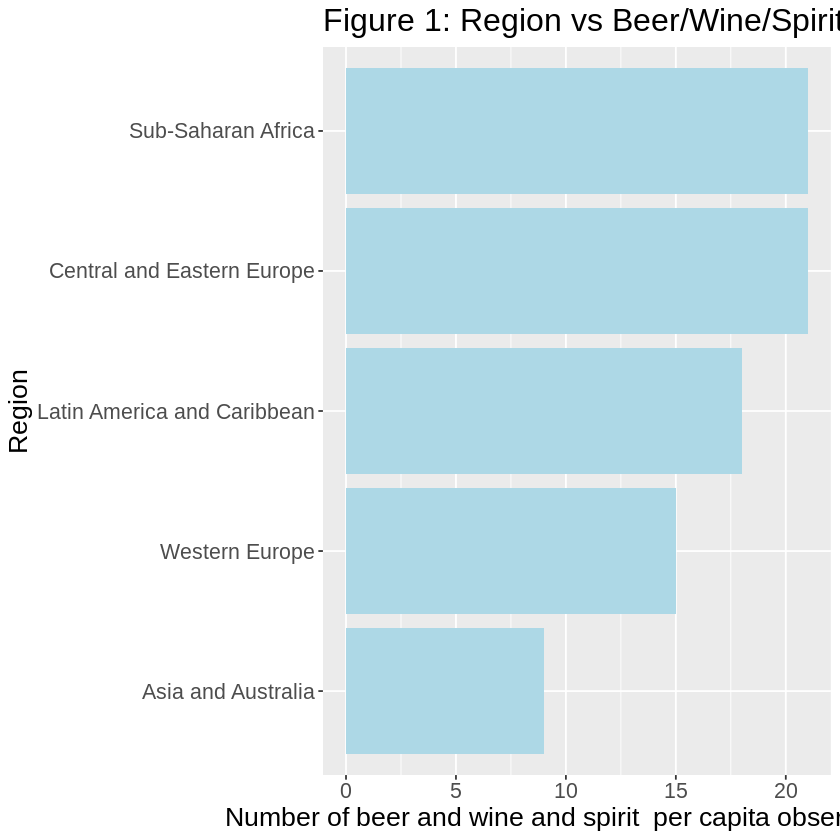

In [8]:
data_summary_graph <- data_summary %>%
                    ggplot(aes(x = n, y = Region)) + 
                    geom_bar(stat = "identity", fill = "lightblue") + 
                    xlab("Number of beer and wine and spirit  per capita observations") + 
                    ylab("Region") + 
                    ggtitle("Figure 1: Region vs Beer/Wine/Spirit per capita observations") + 
                    theme(text = element_text(size = 16))


data_summary_graph

We will now use R to perform cross validation and choose the best K, and we will create a recipe for preprocessing data, and a model specification for K-nearest neighbors regression.  

In [9]:
alco_tr_recipe <- recipe(Region ~ Beer_PerCapita + Wine_PerCapita + Spirit_PerCapita, data = alcohol_train) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

alco_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                set_engine("kknn") %>%
                set_mode("classification")



We used 5 for cross validation instead of 10 as we had 84 observations in total. 

In [10]:
alcohol_vfold <- vfold_cv(alcohol_train, v = 5, strata = Region)

Now we put everything in a workflow and we initially were planning to use 1 to 100 for the number of neighbors, but we altered to 30. 

In [13]:
alco_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 5))


data_results <- workflow() %>%
                add_recipe(alco_tr_recipe) %>%
                add_model(alco_spec)%>%
                tune_grid(resamples = alcohol_vfold, grid = alco_vals) %>%
                collect_metrics()

data_accuracies <- data_results %>%
                filter(.metric == "accuracy")

data_accuracies


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5867957,5,0.03993913,Model1
6,accuracy,multiclass,0.5691099,5,0.05029462,Model2
11,accuracy,multiclass,0.6171362,5,0.04135616,Model3
16,accuracy,multiclass,0.6050413,5,0.04990743,Model4
21,accuracy,multiclass,0.5924432,5,0.05201164,Model5
26,accuracy,multiclass,0.5447472,5,0.06017742,Model6


**Table 7: Accuracy and Number of Neighbors**

Now we will plot data_accuracies to find the best K value 

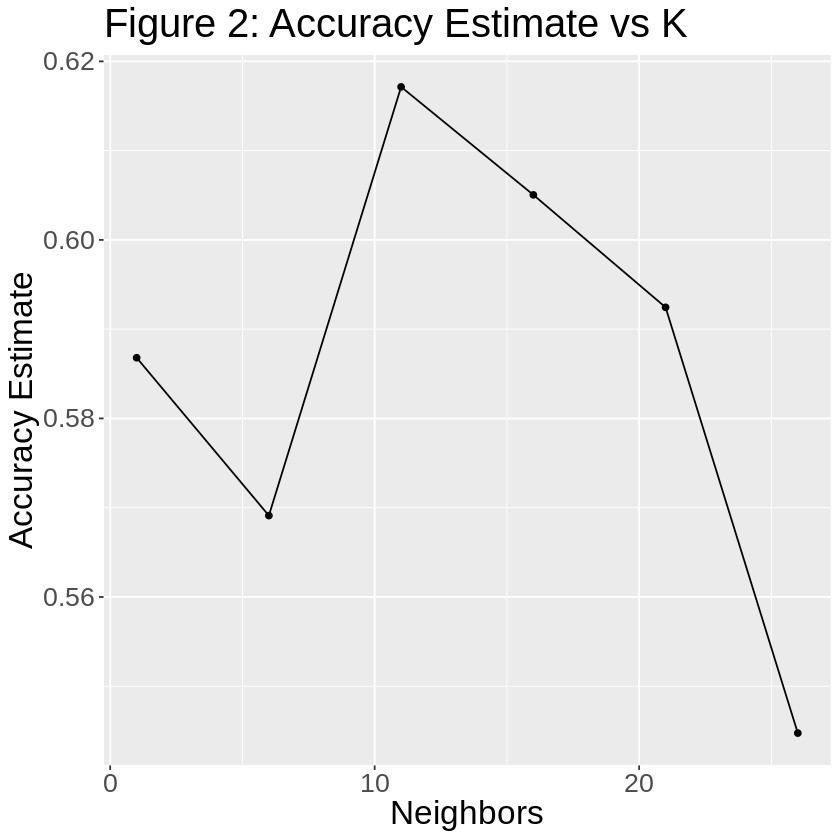

In [14]:
accuracy_vs_k <- ggplot(data_accuracies, aes(x = neighbors, y = mean)) + 
                geom_point() + 
                geom_line() + 
                labs(x = "Neighbors", y = "Accuracy Estimate") + 
                ggtitle("Figure 2: Accuracy Estimate vs K") + 
                theme(text = element_text(size = 20))

accuracy_vs_k

From the graph we have determined the optimal K to be 11, with an accuracy of approximately 62% and we made a new model with our new best K.

In [17]:
knn_spec_new <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) %>%
                set_engine("kknn") %>%
                set_mode("classification")

knn_fit <- knn_spec_new %>%
            fit(Region ~ Beer_PerCapita + Wine_PerCapita + Spirit_PerCapita, data = alcohol_train)

new_obs <- tibble(Beer_PerCapita = 290, Wine_PerCapita = 260 , Spirit_PerCapita = 280) 

predict(knn_fit, new_obs)

            
                

.pred_class
<fct>
Central and Eastern Europe


**Table 8: Prediction of an Arbitrary Value**

It was determined that our prediction gave Central and Eastern Europe 

In [18]:
knn_fit2 <- workflow() %>%
            add_recipe(alco_tr_recipe) %>%
            add_model(knn_spec_new) %>%
            fit(data = alcohol_train)

validation_predicted <- predict(knn_fit2, alcohol_test) %>%
                    bind_cols(alcohol_test)


acc <- validation_predicted %>%
      metrics(truth = Region, estimate = .pred_class) %>%
      filter(.metric == "accuracy") %>%
        select(.estimate) %>%
        pull()

acc
                         

[1] 0.64

The accuracy of the classifier on the testing data came out to be 64%. 

Then we made a visualization of the result (the accuracy of our classifier), and we decided to choose Beer and Spirit per Capita because the values for the Wine per Capita column were moref 

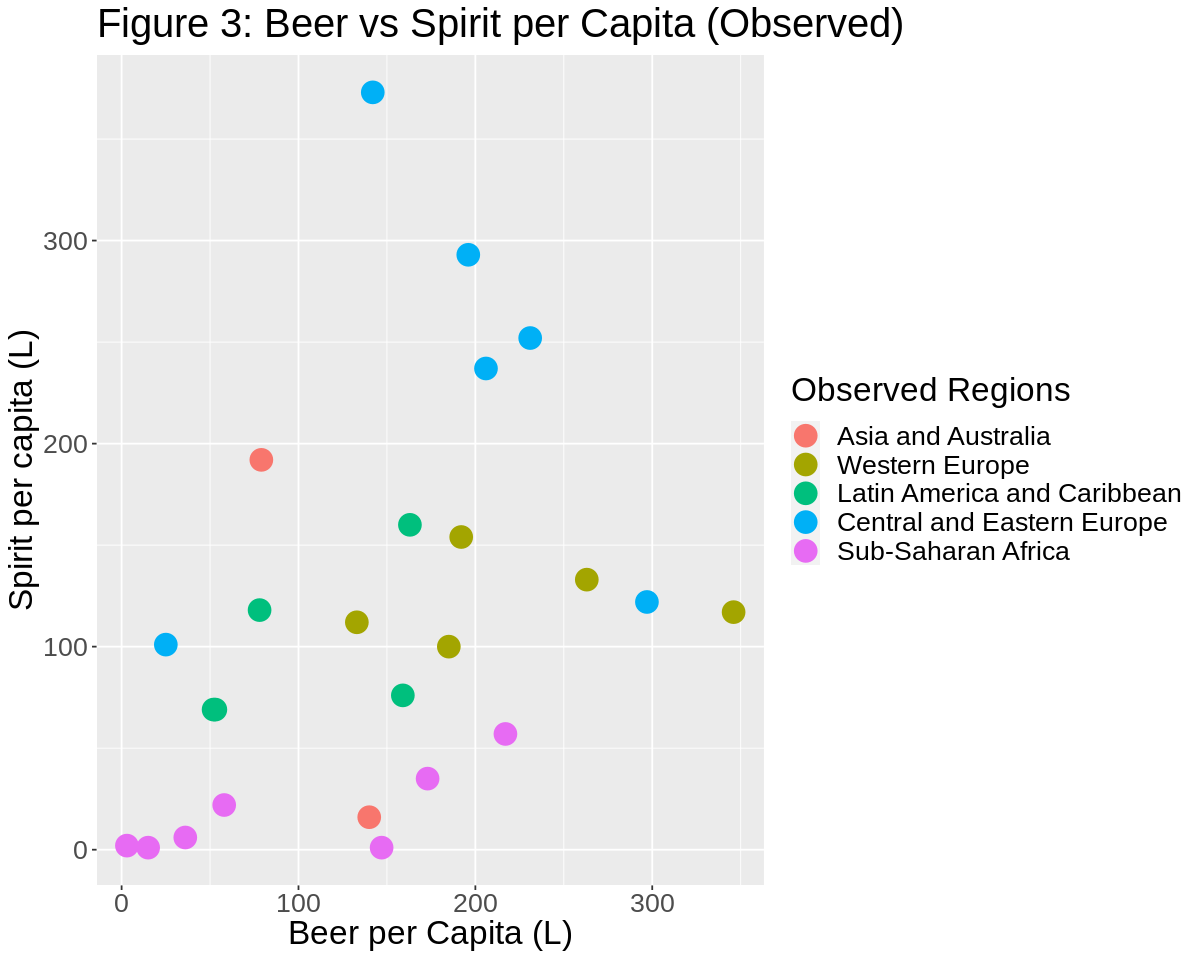

In [19]:
options(repr.plot.width = 10, repr.plot.height = 8)

vis_plot <- validation_predicted %>%
        ggplot(aes(x = Beer_PerCapita, y = Spirit_PerCapita, colour = Region)) + 
        labs(x = "Beer per Capita (L)", y = "Spirit per capita (L)", colour = "Observed Regions") + 
        geom_point(size = 6) + 
        ggtitle("Figure 3: Beer vs Spirit per Capita (Observed)") + 
        theme(text = element_text(size = 20))
               
vis_plot
    

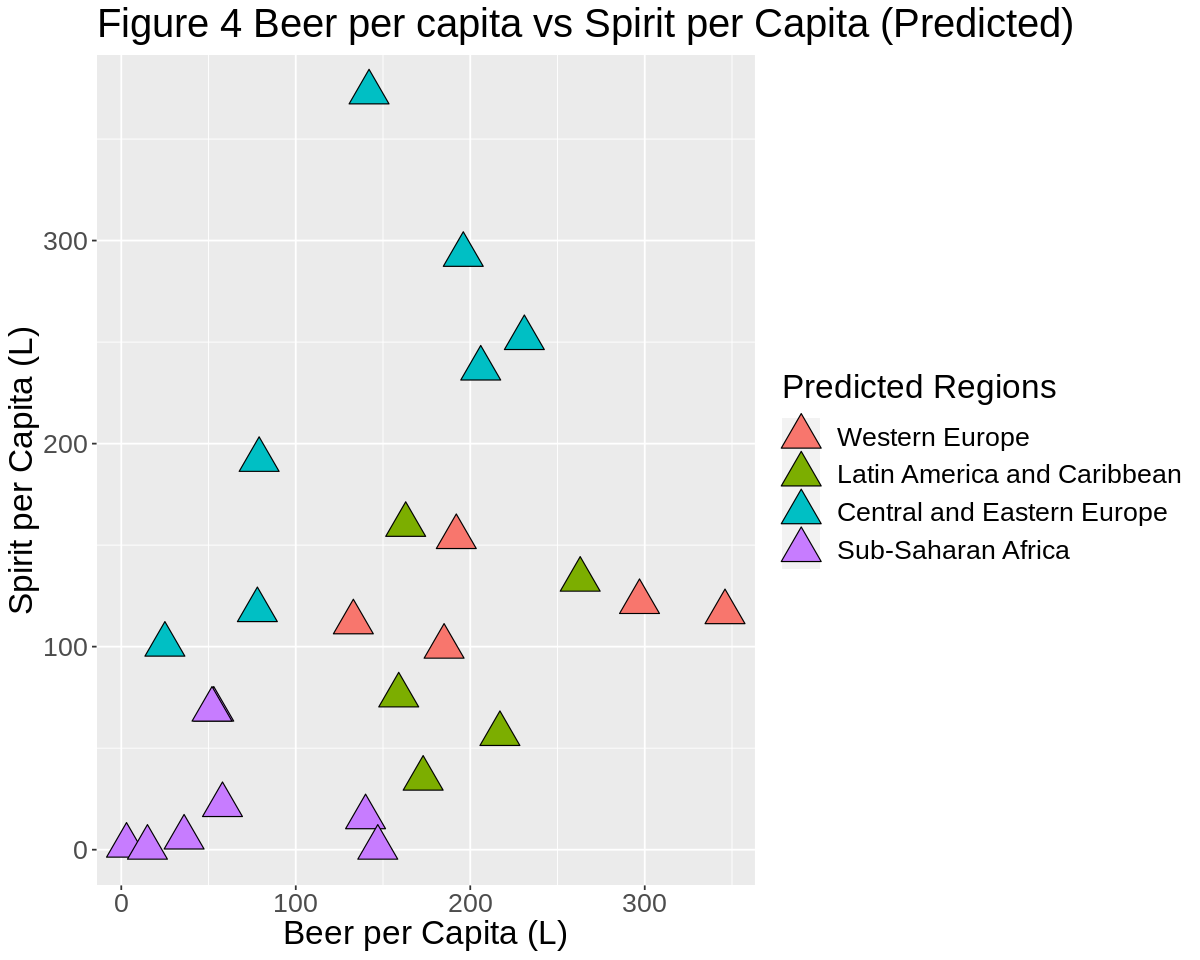

In [22]:
options(repr.plot.width = 10, repr.plot.height = 8)

library(ggplot2)

vis_plot2 <- validation_predicted %>%
        ggplot(aes(x = Beer_PerCapita, y = Spirit_PerCapita, fill = .pred_class)) + 
        labs(x = "Beer per Capita (L)", y = "Spirit per Capita (L)", fill = "Predicted Regions") + 
        geom_point(size = 8, shape = 24) + 
        ggtitle("Figure 4 Beer per capita vs Spirit per Capita (Predicted) ") + 
         theme(text = element_text(size = 20))
               
vis_plot2

Conclusion 

We found that the accuracy of our classifier with the best number of neighbors was approximately 64% on our testing data. Our group had expected to find an accuracy rate of over 70% for our predictor. An interesting note is that our data performed better on the testing data (64%) than on the training data (62%). 

Our hypothesis turned out to be incorrect. We initially predicted that if we chose large arbitrary values for Wine, Spirit, and Beer consumption per capita for some unknown arbitrary region, our predictor would classify the region as Western Europe. However, it got classified to Central and Eastern Europe. 

This may be due to the fact that our dataset was built from information collected in 2016, whereas the research that we based our hypothesis on dated from 2003. Thus, we expected that these wet, and dry culture norms would have stayed consistent; however, based on our results it seems that with time, the changing of drinking norms may have discouraged or encouraged alcohol consumption in different regions. For example, for Western Europe, drinking may be in a more discouraged state than 2003, and Central and Eastern Europe may have undergone social and cultural changes that increased levels of alcohol consumption. Today, the Western European region may not be considered a “Wet” culture like it would have been nineteen years ago.

The future questions that arise from our results mainly concern the correlation between alcohol consumption and human behavior. Some of these include:

Which social or cultural practices have the biggest influence on deciding normative drinking behavior?

How did these social or cultural practices that encourage drinking behavior change over time in different regions?

What is the relationship between alcohol consumption and prevalence of crime? In areas where alcohol consumption is high, is there also an increased number of car accidents?

For regions with high alcohol consumption, what is the relative life expectancy compared to regions with lower alcohol consumption?

Ultimately, our data analysis shows that levels of alcohol consumption have incredibly high variability, both across regions and across time. Alcohol consumption is a popular topic across all forms of scientific study. Hundreds of correlational studies and experiments have looked at the connections between the consumption of alcoholic substances and the resulting impacts on human behavior. With these findings, societies and communities attempt to make changes to best educate people about the risks of alcohol consumption. Governments use these findings to change or create new laws that better regulate both the consumption and distribution of alcohol. It is evident that alcohol consumption has always been and will continue to always be a very relevant and influential subject. The significance of alcohol data and its variability highlight the importance of constantly updating the information we have about alcohol consumption and the importance of designing experiments and studies around the absolute most recent information there is. Engaging in these two practices ultimately allows for communities to create the most appropriate response to the ever so changing norms of alcohol consumption.

Sources:

Babor, Thomas F. “Alcohol: No Ordinary Commodity – a Summary of the Second Edition.” Wiley Online Library, Alcohol and Public Policy Group, 8 Apr. 2010, https://onlinelibrary.wiley.com/doi/10.1111/j.1360-0443.2010.02945.x. 

Bloomfield, Kim, et al. “International Comparisons of Alcohol Consumption.” National Institute on Alcohol Abuse and Alcoholism, U.S. Department of Health and Human Services, Dec. 2003, https://pubs.niaaa.nih.gov/publications/arh27-1/95-109.htm. 

Bosque-Prous, Marina, et al. “Job Loss, Unemployment and the Incidence of Hazardous Drinking during the Late 2000s Recession in Europe among Adults Aged 50–64 Years.” PLOS ONE, Public Library of Science, Oct. 2015, https://journals.plos.org/plosone/article?id=10.1371%2Fjournal.pone.0140017. 

Millwood, Iona Y, et al. “Alcohol Consumption in 0.5 Million People from 10 Diverse Regions of China: Prevalence, Patterns and Socio-Demographic and Health-Related Correlates.” OUP Academic, Oxford Academic, 1 Aug. 2013, https://academic.oup.com/ije/article/42/3/816/913432?login=true. 

Ritchie, Hannah, and Max Roser. “Alcohol Consumption.” Our World in Data, 16 Apr. 2018, https://ourworldindata.org/alcohol-consumption. 


